In [20]:
##Paths
DATADIR = "C:/Users/funmi/Roadsignfile"
Train_data = "C:/Users/funmi/Roadsignfile/train"
Test_data = "C:/Users/funmi/Roadsignfile/test"
Validation_data = "C:/Users/funmi/Roadsignfile/val"

In [21]:
import os
#directories the neural network will detect
myList = os.listdir(DATADIR)
mytrainList = os.listdir(Train_data)
mytestList = os.listdir(Test_data)
myvalidationList = os.listdir(Validation_data)

#to print the names of the categories in the directories  
print("Name of folders:")
print("Folder names in DATADIR:",(myList))                                   
print("Folder names in Train folder:",(mytrainList))
print("Folder names in Test folder:",(mytestList))
print("Folder names in Validation folder:",(myvalidationList))

#to print the number of classes in the directories
print("Number of categories:")
print("Total categories detected in DATADIR:",len(myList))     
print("Total categories detected in Train folder:",len(mytrainList))   
print("Total categories detected in Test folder:",len(mytestList)) 
print("Total categories detected in Validation folder:",len(myvalidationList))  


Name of folders:
Folder names in DATADIR: ['test', 'train', 'val']
Folder names in Train folder: ['No Speed limit', 'Speed limit']
Folder names in Test folder: ['No Speed limit', 'Speed limit']
Folder names in Validation folder: ['No Speed limit', 'Speed limit']
Number of categories:
Total categories detected in DATADIR: 3
Total categories detected in Train folder: 2
Total categories detected in Test folder: 2
Total categories detected in Validation folder: 2


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Augmentation
dgen_train = ImageDataGenerator(rescale=1./255, 
                                zoom_range=-0.15,
                                horizontal_flip=True,
                                brightness_range = [0.2,2.0],
                                rotation_range = 10,
                                height_shift_range =0.1,
                                fill_mode = 'nearest')
dgen_val = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

In [23]:
##Parameters for train, test and validation split
Image_shape = (200,200,3)  
batch_size = 50
class_mode = 'binary'

In [24]:
# Generate training
train_generator = dgen_train.flow_from_directory(Train_data,
                                               target_size=Image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode=class_mode)

Found 128 images belonging to 2 classes.


In [25]:
# Generate validation 
validation_generator = dgen_val.flow_from_directory(Validation_data,
                                               target_size=Image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode=class_mode)

Found 32 images belonging to 2 classes.


In [26]:
# Generate testing
test_generator = dgen_test.flow_from_directory(Test_data,
                                               target_size=Image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode=class_mode)

Found 40 images belonging to 2 classes.


In [27]:
# Get the class indices
classes = train_generator.class_indices
classes

{'No Speed limit': 0, 'Speed limit': 1}

In [28]:
from skimage import io
def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

50
0.0


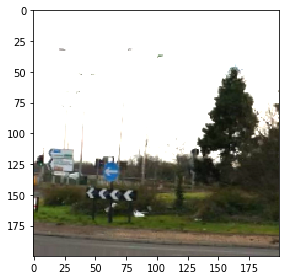

0.0


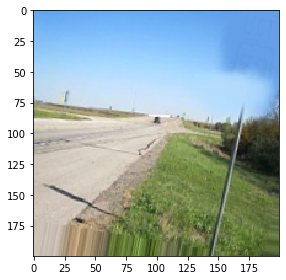

1.0


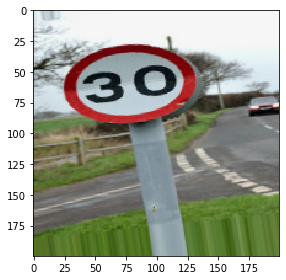

1.0


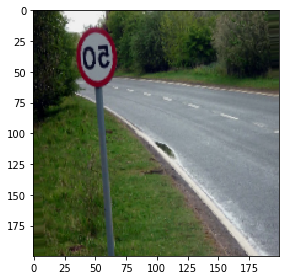

0.0


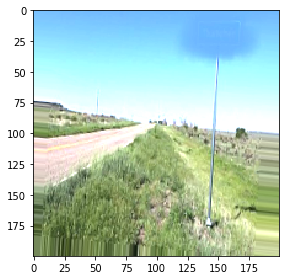

1.0


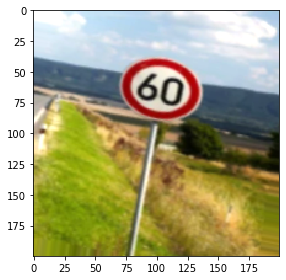

1.0


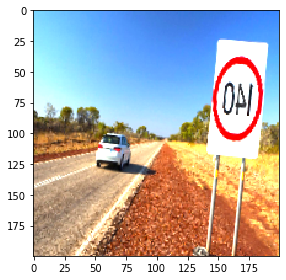

0.0


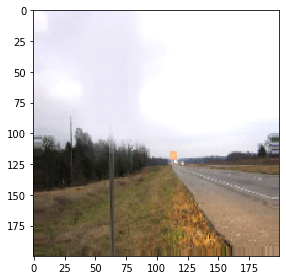

0.0


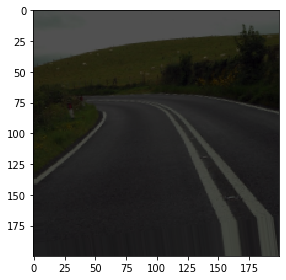

1.0


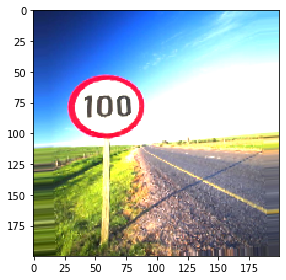

1.0


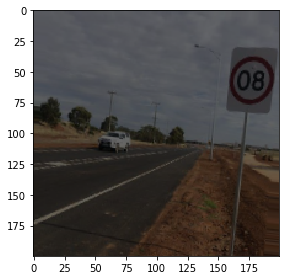

0.0


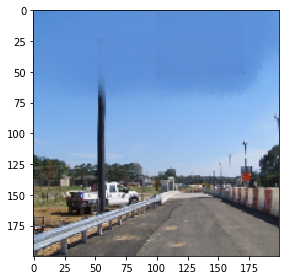

1.0


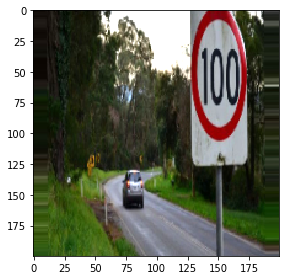

0.0


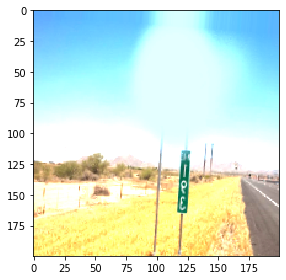

0.0


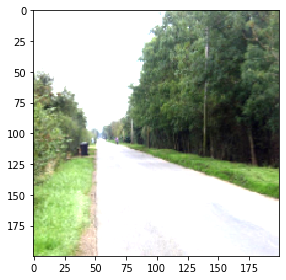

1.0


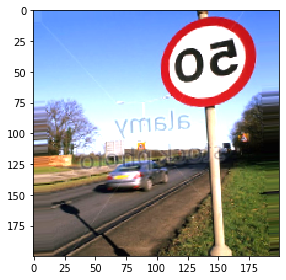

1.0


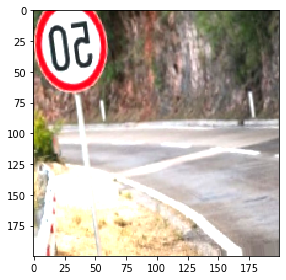

0.0


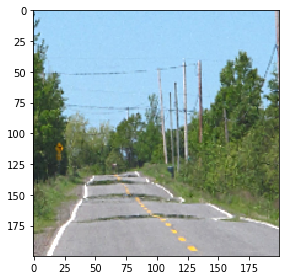

1.0


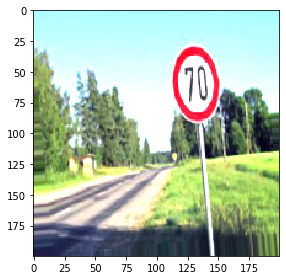

1.0


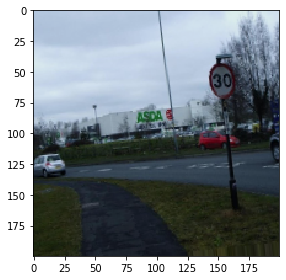

0.0


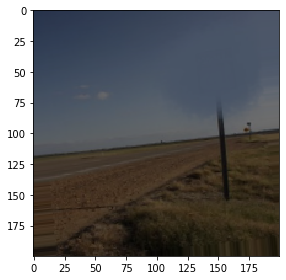

1.0


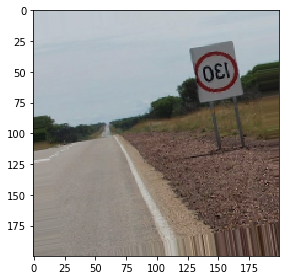

0.0


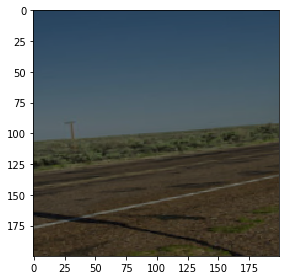

1.0


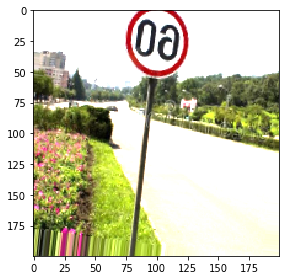

1.0


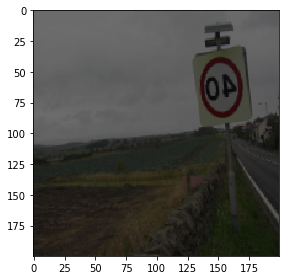

0.0


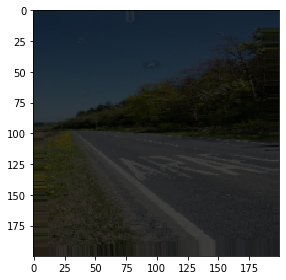

1.0


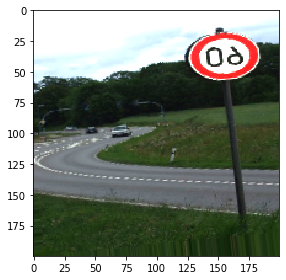

1.0


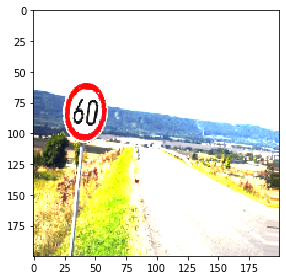

1.0


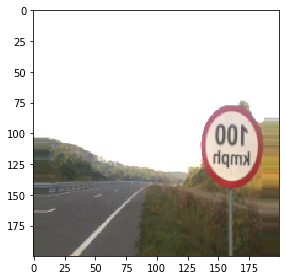

1.0


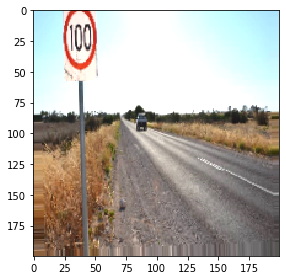

1.0


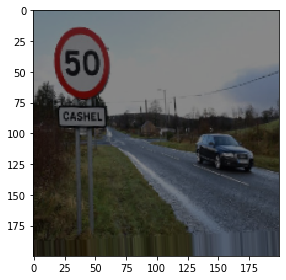

1.0


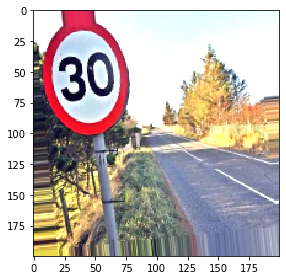

0.0


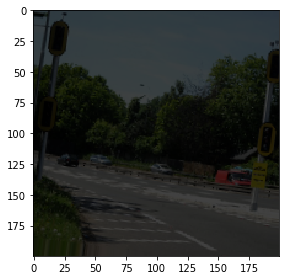

1.0


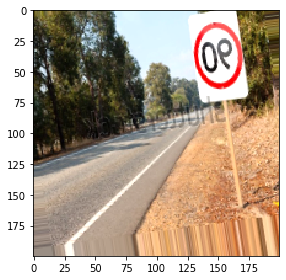

1.0


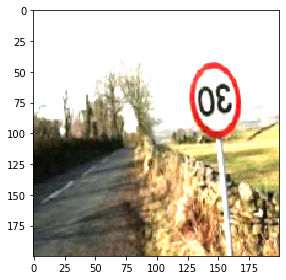

0.0


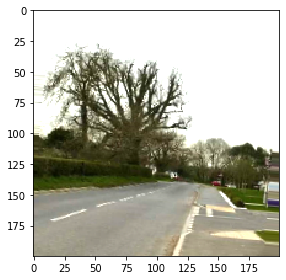

0.0


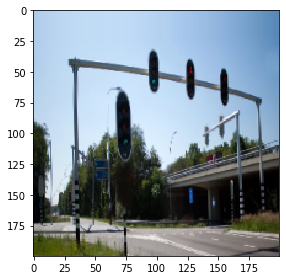

0.0


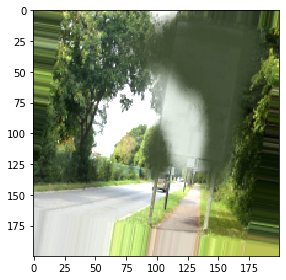

0.0


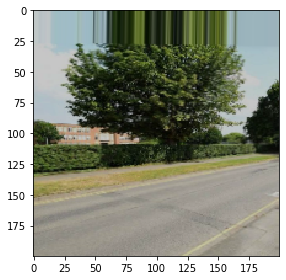

1.0


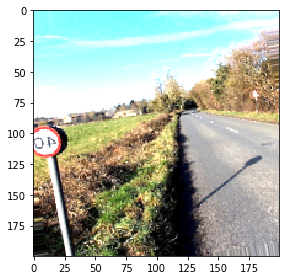

0.0


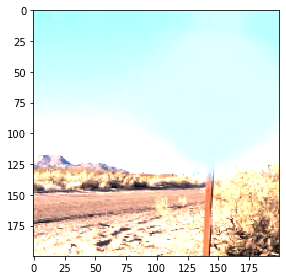

0.0


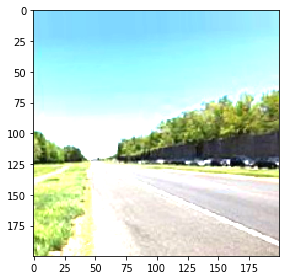

0.0


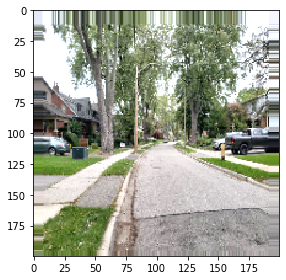

0.0


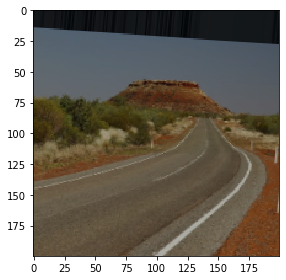

1.0


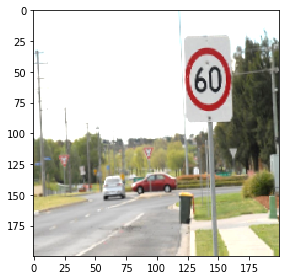

1.0


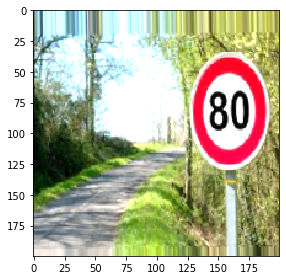

1.0


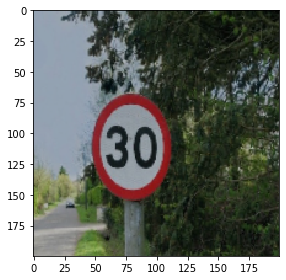

0.0


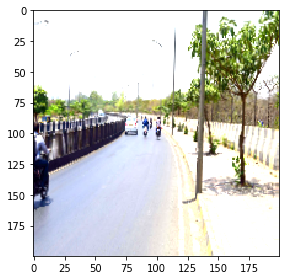

1.0


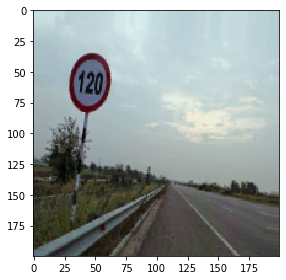

1.0


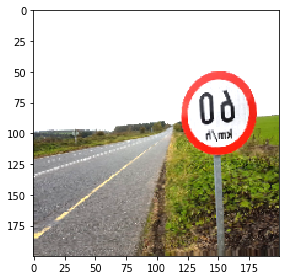

In [29]:
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [30]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

# Building CNN Model
noOfFilters=32
sizeOfFilter=(3,3)
imageDimensions = (200,200,3)

model = Sequential()

#input layer
model.add(Conv2D(noOfFilters, sizeOfFilter, padding='same', activation='relu',
                input_shape=imageDimensions))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#First hidden layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Second hidden layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Third hidden Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

#Output layer
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [31]:
print(model.summary())
history = model.fit(train_generator,
          epochs=30,
          validation_data=validation_generator)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)       

In [32]:
##Evaluate the model to see how well the test dataset performs
score = model.evaluate(test_generator)   #evaluating the test data set
print('Test Score = ',score[0])
print('Test Accuracy =', score[1])

  ...
    to  
  ['...']
1/1 [==============================] - 1s 564ms/step - loss: 0.3213 - accuracy: 0.8750
Test Score =  0.32130345702171326
Test Accuracy = 0.875


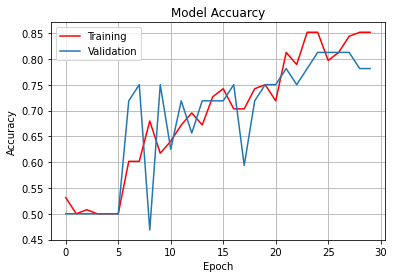

In [33]:
from matplotlib import pyplot as plt
##visualise model accuracy 
plt.figure(5)
plt.grid(True)
plt.plot(history.history['accuracy'], color= 'r')
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])
plt.title('Model Accuarcy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

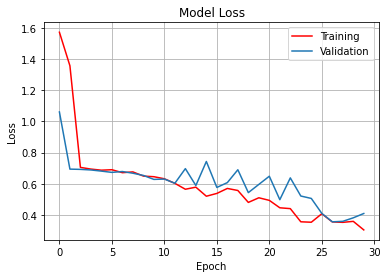

In [34]:
##visualise model loss
plt.figure(5)
plt.grid(True)
plt.plot(history.history['loss'], color= 'r')
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [35]:
# save the entire model
model.save('model.h5')    # model is a trained keras model.

In [36]:
from tensorflow import keras
import numpy as np
import cv2
#testing the model on the testing dataset
def classifier(Test_data):
    Current_img = keras.preprocessing.image.load_img(Test_data, target_size=(200,200))
    Current_img = keras.preprocessing.image.img_to_array(Current_img)
    Current_img = np.expand_dims(Current_img, axis=0)
    Current_img = Current_img/255
    Current_img = np.vstack([Current_img])
    prediction = model.predict_classes(Current_img)[0][0]
    accuracy = model.predict(Current_img)[0][0]
    plt.imshow(cv2.imread(Test_data))
    print('Accuracy', accuracy)
    if prediction:
        print('Speed Limit')
    else:
        print('No Speed Limit')

Accuracy 0.2786536
No Speed Limit


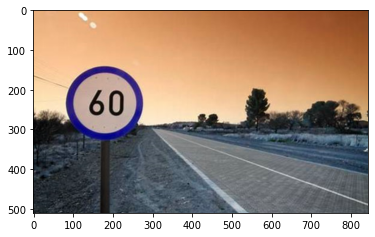

In [37]:
classifier("C:/Users/funmi/Pictures/rs6.jpg")

Accuracy 0.08466475
No Speed Limit


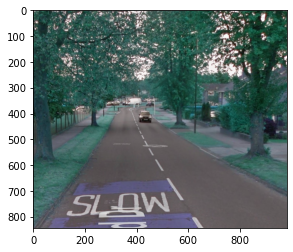

In [38]:
classifier("C:/Users/funmi/Pictures/nrs.jpg")